# inport data

# read DATA


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
file_path = "../data/filled_data_label_numeric.xlsx"
filled_data_label_numeric_df = pd.read_excel(file_path,engine='openpyxl')
filled_data_label_numeric_df

,gender,dept_flg,area_flg,cntr_flg,agent_level,agent_status,fyp_month_avg,persistence_prem_25,salary_ded_ratio,xagfd_flag,...,rule30_counts_missing_flag,rule31_counts_missing_flag,rule32_counts_missing_flag,rule33_counts_missing_flag,rule34_counts_missing_flag,rule35_counts_missing_flag,rule36_counts_missing_flag,rule37_counts_missing_flag,rule38_counts_missing_flag,rule39_counts_missing_flag
0,1,2,4,4,25,2,30054.25,94.42,33.33,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,9,3,11,0,68389.32,100.00,33.33,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,4,4,33,1,14618.46,94.42,33.33,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,4,28,33,1,42400.30,94.42,33.33,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,4,28,33,0,23869.50,0.00,33.33,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,0,2,4,4,33,1,30268.00,94.42,33.33,0,...,0,0,0,0,0,0,0,0,0,0
4015,0,2,5,8,33,1,44524.35,94.42,33.33,0,...,0,0,0,0,0,0,0,0,0,0
4016,1,2,4,28,27,1,36144.52,94.42,33.33,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,1,13,5,33,1,30268.00,94.42,33.33,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 刪除非數值型欄位，例如 abnormal_target 及標記缺失值的欄位
columns_to_drop = ["abnormal_target"] + [col for col in filled_data_label_numeric_df.columns if "missing_flag" in col]
df_cleaned = filled_data_label_numeric_df.drop(columns=columns_to_drop)


In [4]:
df_cleaned

,gender,dept_flg,area_flg,cntr_flg,agent_level,agent_status,fyp_month_avg,persistence_prem_25,salary_ded_ratio,xagfd_flag,...,rule30_counts,rule31_counts,rule32_counts,rule33_counts,rule34_counts,rule35_counts,rule36_counts,rule37_counts,rule38_counts,rule39_counts
0,1,2,4,4,25,2,30054.25,94.42,33.33,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,9,3,11,0,68389.32,100.00,33.33,0,...,0,0,0,3,0,0,1,0,0,0
2,1,2,4,4,33,1,14618.46,94.42,33.33,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,4,28,33,1,42400.30,94.42,33.33,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,4,28,33,0,23869.50,0.00,33.33,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,0,2,4,4,33,1,30268.00,94.42,33.33,0,...,0,0,0,0,0,0,0,1,0,0
4015,0,2,5,8,33,1,44524.35,94.42,33.33,0,...,0,0,0,3,0,0,1,1,0,0
4016,1,2,4,28,27,1,36144.52,94.42,33.33,0,...,0,0,0,0,0,0,0,1,0,0
4017,0,1,13,5,33,1,30268.00,94.42,33.33,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
from sklearn.preprocessing import StandardScaler

# 對數據進行標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)


# 做PCA

In [6]:
from sklearn.decomposition import PCA

# 設定要保留的主成分數量，這裡設置為所有主成分
pca = PCA(n_components=min(X_scaled.shape[0], X_scaled.shape[1]))  # 保留所有主成分
X_pca = pca.fit_transform(X_scaled)

# 查看每個主成分的解釋變異量
print("解釋變異量：", pca.explained_variance_ratio_)


解釋變異量： [0.12676236 0.06042261 0.04203637 0.03470778 0.03301742 0.0295038
 0.02533601 0.02366412 0.02152197 0.0210929  0.02057944 0.0200627
 0.01964615 0.01904141 0.01888645 0.01790755 0.0177693  0.01714118
 0.0169398  0.01677611 0.01635182 0.015699   0.01551573 0.01535069
 0.01480826 0.01455141 0.01427522 0.01385343 0.01358191 0.01329369
 0.01299179 0.01272692 0.01232526 0.01185162 0.01163227 0.01142252
 0.0112359  0.0109222  0.01061103 0.01048063 0.01034162 0.00995644
 0.0096221  0.00934956 0.00914527 0.00854607 0.00832691 0.0081971
 0.00775044 0.00762161 0.00730889 0.00677539 0.006185   0.00563644
 0.00489766 0.00442434 0.00343424 0.00266727 0.00253993 0.00084927
 0.00012774 0.         0.        ]


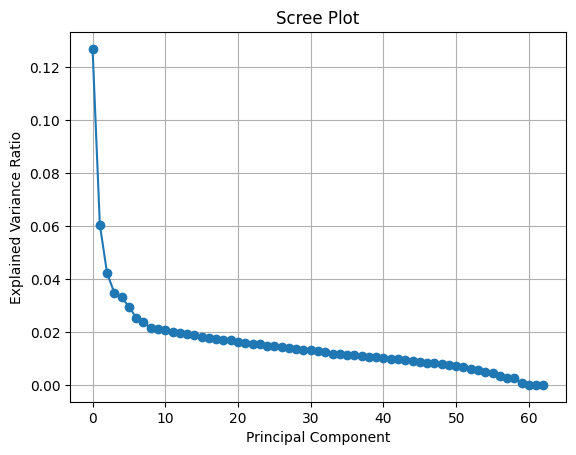

In [12]:
# 累積變異量
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


# 把能解釋80%跟90%變異的PCA結果存入data

In [15]:
# 找到80%與90%變異量所需的主成分數
n_pc_80 = next(i+1 for i, var in enumerate(cumulative_variance) if var >= 0.80)
n_pc_90 = next(i+1 for i, var in enumerate(cumulative_variance) if var >= 0.90)

# 擷取對應的主成分資料
X_pca_80 = X_pca[:, :n_pc_80]
X_pca_90 = X_pca[:, :n_pc_90]

# 轉換成 DataFrame（可以加上 PC 標籤）
df_pca_80 = pd.DataFrame(X_pca_80, columns=[f'PC{i+1}' for i in range(n_pc_80)])
df_pca_90 = pd.DataFrame(X_pca_90, columns=[f'PC{i+1}' for i in range(n_pc_90)])

# 儲存為 CSV（可先確保資料夾存在）
os.makedirs('../data', exist_ok=True)
df_pca_80.to_csv('../data/PCA80.csv', index=False)
df_pca_90.to_csv('../data/PCA90.csv', index=False)

print(f'✅ PCA80.csv 儲存成功，共 {n_pc_80} 個主成分')
print(f'✅ PCA90.csv 儲存成功，共 {n_pc_90} 個主成分')

✅ PCA80.csv 儲存成功，共 35 個主成分
✅ PCA90.csv 儲存成功，共 44 個主成分
